<a href="https://colab.research.google.com/github/Rajaa252/BigData/blob/main/TFM_IPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#CARGA Y LIMPIEZA DE DATOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from google.colab import files

# Cargar archivo
uploaded = files.upload()
archivo = "data_norm.xlsx"
xls = pd.ExcelFile(archivo)

# Mostrar hojas disponibles y cargar hoja principal
print("Hojas disponibles:", xls.sheet_names)
df = pd.read_excel(xls, sheet_name="Generacion_IPI_Normalizada")

# Limpieza básica
df.columns = df.columns.str.strip()  # Quitar espacios
df = df.loc[:, ~df.columns.duplicated()]  # Eliminar duplicadas

# Crear columna de fecha si no existe
if "Fecha" not in df.columns:
    df["Fecha"] = pd.date_range(start="2013-01", periods=len(df), freq="MS")
else:
    df["Fecha"] = pd.to_datetime(df["Fecha"], yearfirst=True)

Saving data_norm.xlsx to data_norm.xlsx
Hojas disponibles: ['Generacion_IPI_Normalizada']


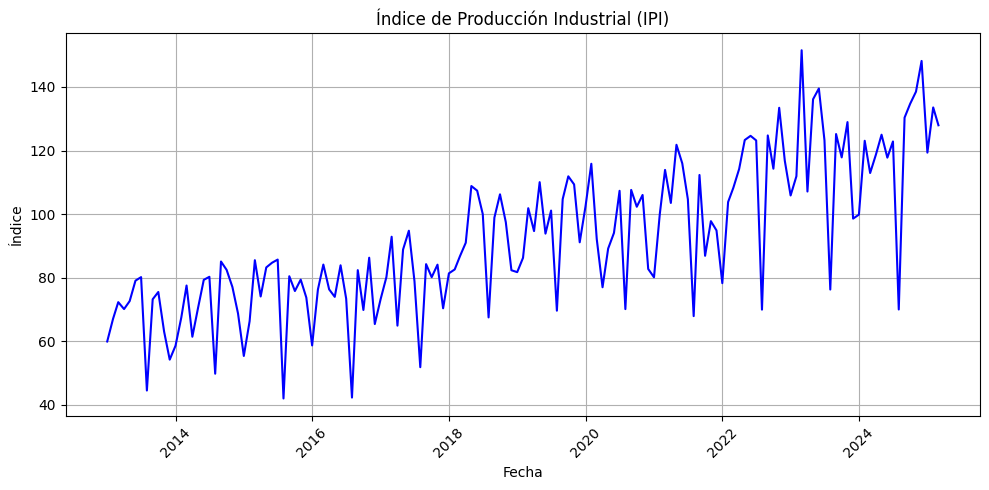

In [3]:
#GRAFICO DE EVOLUCIÓN IPI

plt.figure(figsize=(10, 5))
plt.plot(df["Fecha"], df["Indice_IPI"], color='blue')
plt.title("Índice de Producción Industrial (IPI)")
plt.xlabel("Fecha")
plt.ylabel("Índice")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

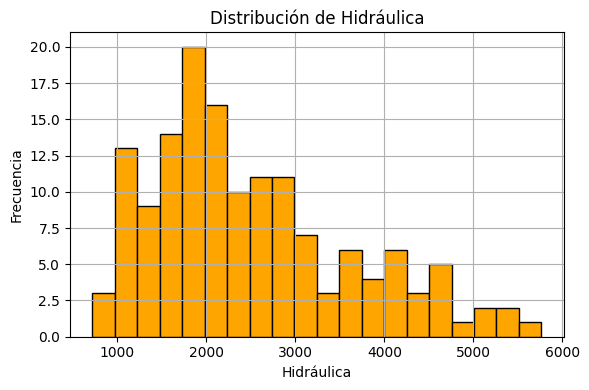

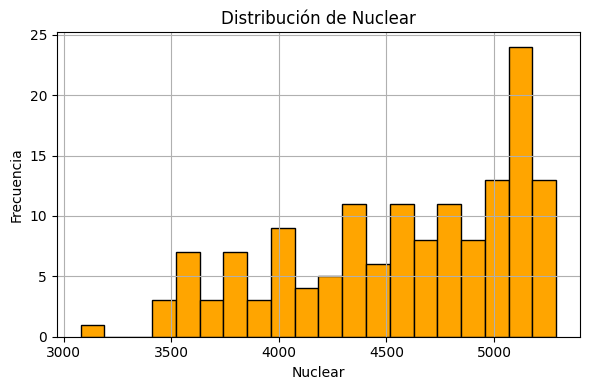

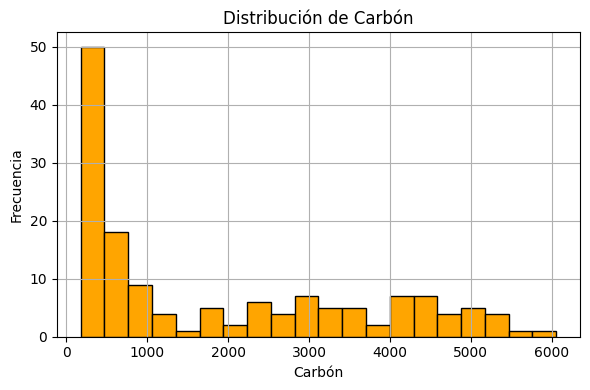

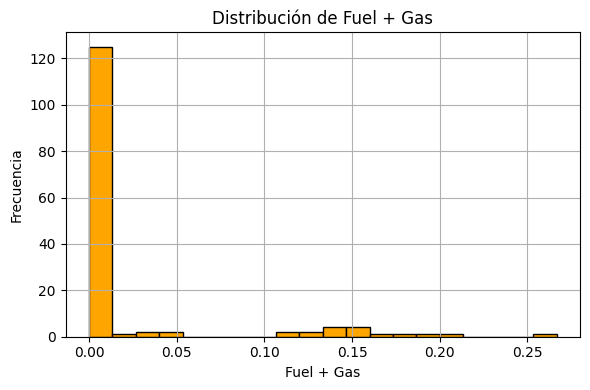

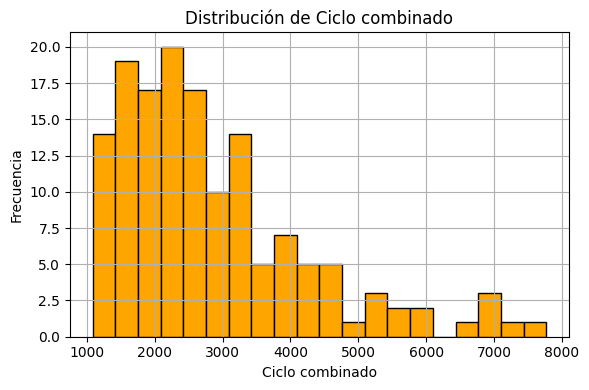

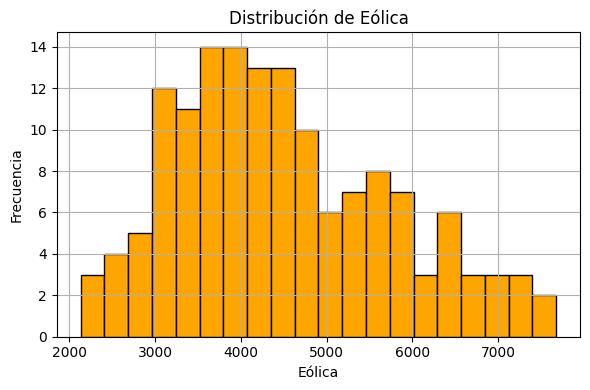

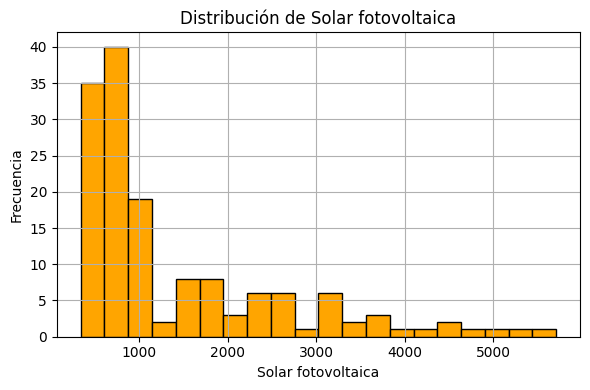

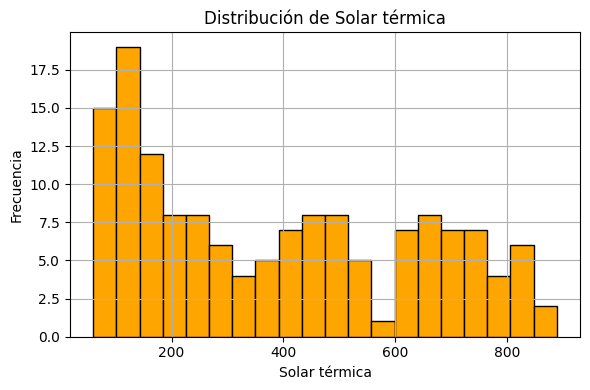

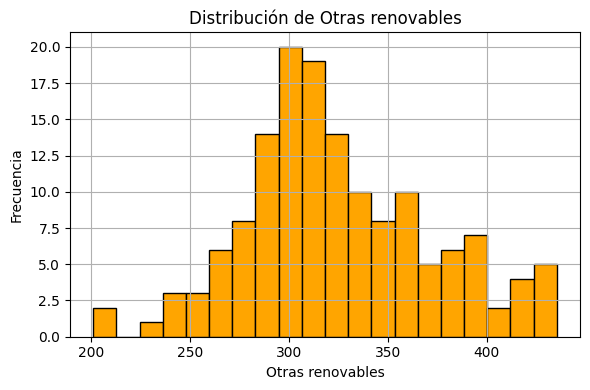

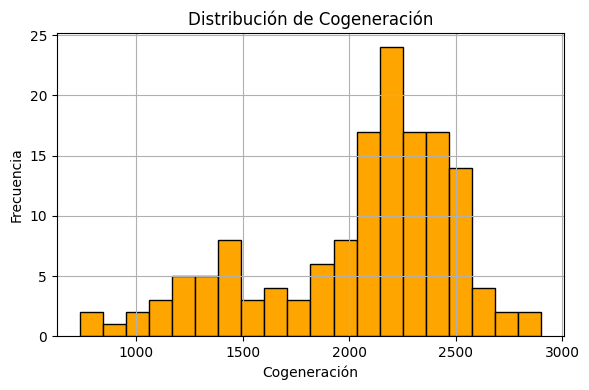

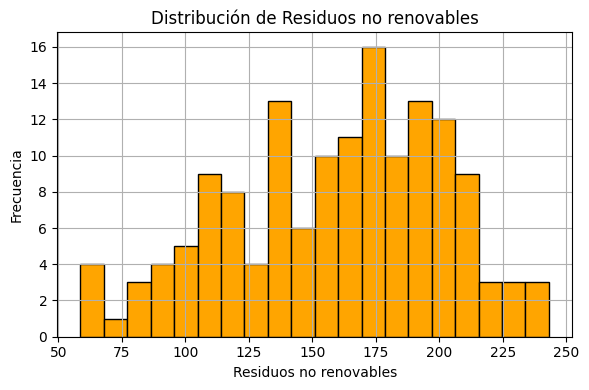

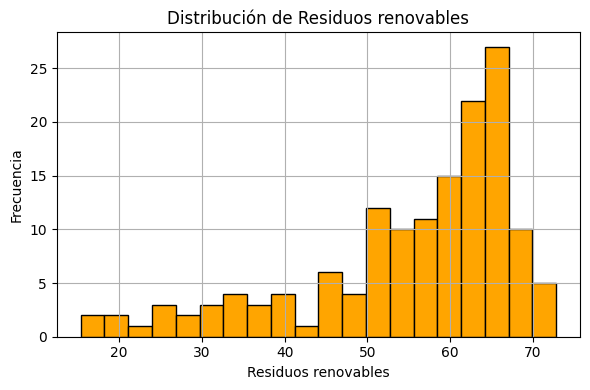

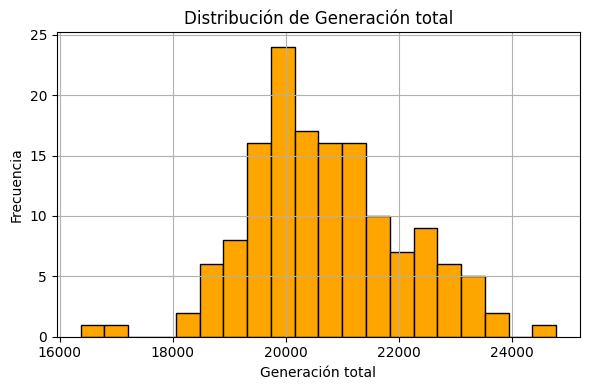

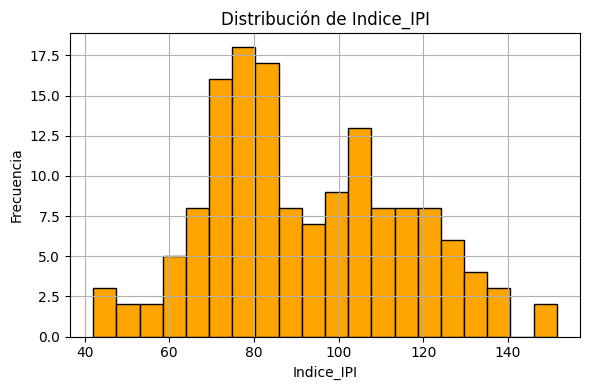

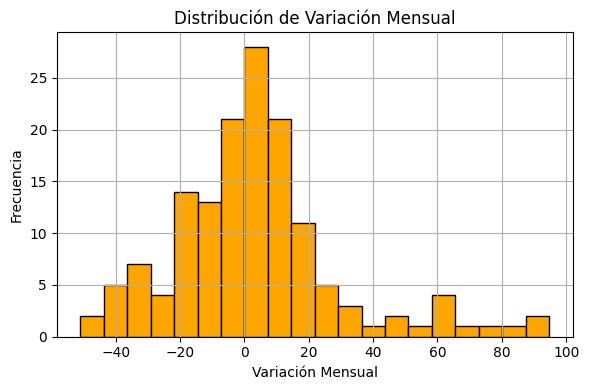

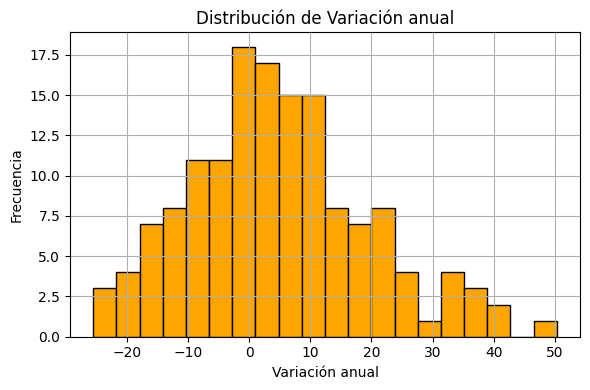

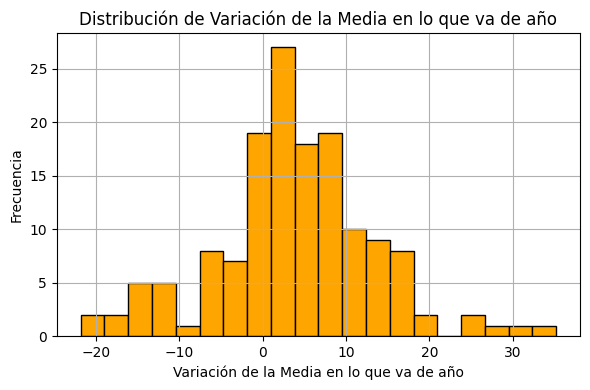

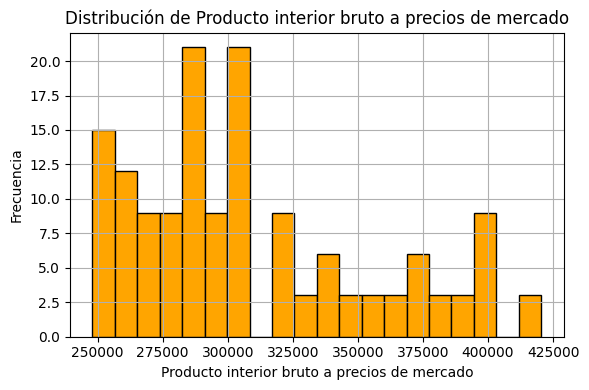

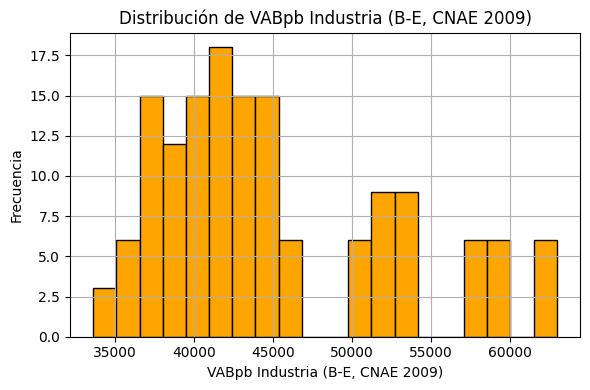

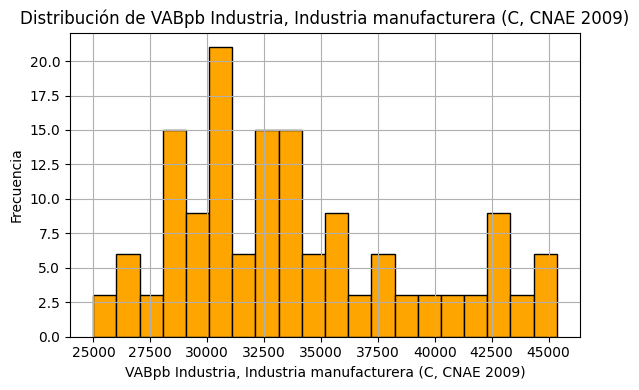

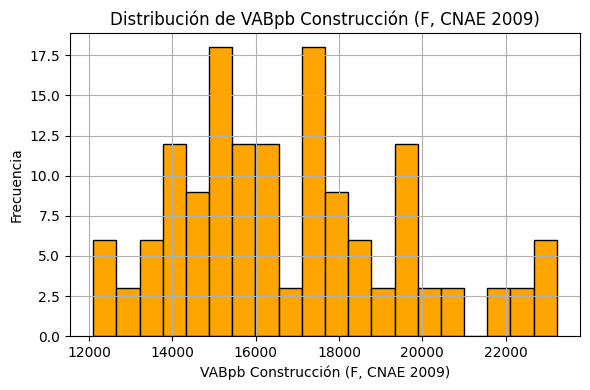

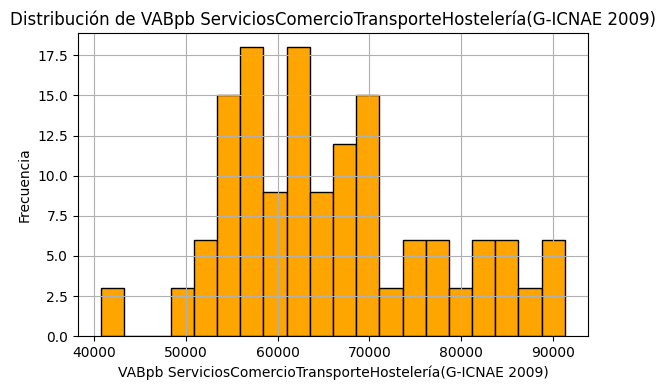

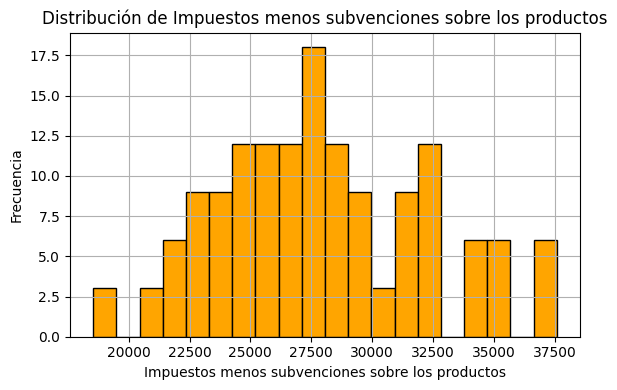

In [4]:
#HISTOGRAMA PARA VARIABLES NUMÉRICAS
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, edgecolor='black', color='orange')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

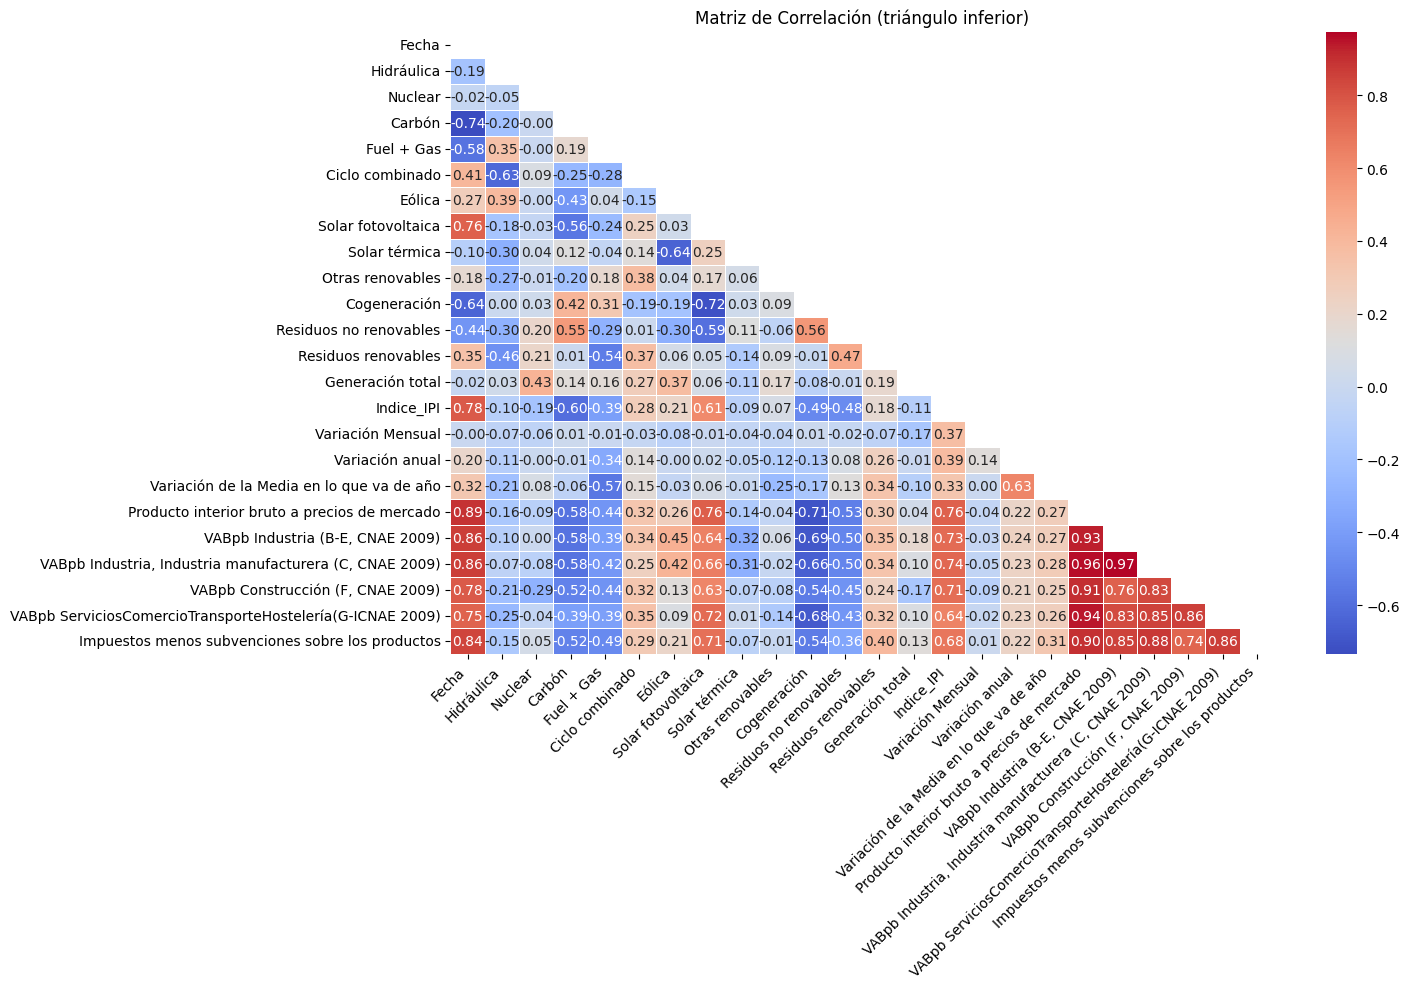

Variables altamente correlacionadas (|r| > 0.8):
                                            Variable 1  \
17                                               Fecha   
18                                               Fecha   
19                                               Fecha   
22                                               Fecha   
261       Producto interior bruto a precios de mercado   
262       Producto interior bruto a precios de mercado   
263       Producto interior bruto a precios de mercado   
264       Producto interior bruto a precios de mercado   
265       Producto interior bruto a precios de mercado   
266                   VABpb Industria (B-E, CNAE 2009)   
268                   VABpb Industria (B-E, CNAE 2009)   
269                   VABpb Industria (B-E, CNAE 2009)   
270  VABpb Industria, Industria manufacturera (C, C...   
271  VABpb Industria, Industria manufacturera (C, C...   
272  VABpb Industria, Industria manufacturera (C, C...   
273                  VA

In [5]:
#MATRIZ DE CORRELACIÓN

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación (triángulo inferior)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Mostrar pares de variables altamente correlacionadas (|r| > 0.8)
high_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']
print("Variables altamente correlacionadas (|r| > 0.8):")
print(high_corr_pairs[high_corr_pairs['Correlación'].abs() > 0.8])

<ipython-input-6-ae2130d4d752>:34: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


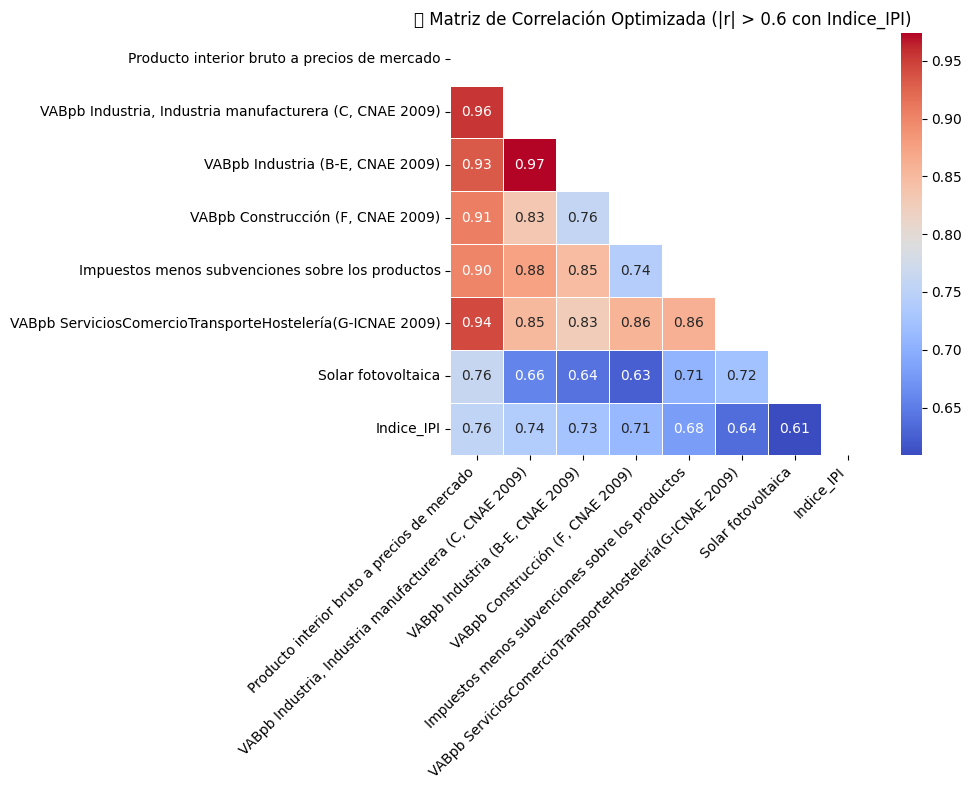

 Variables seleccionadas (sin columnas excluidas):
['Producto interior bruto a precios de mercado', 'VABpb Industria, Industria manufacturera (C, CNAE 2009)', 'VABpb Industria (B-E, CNAE 2009)', 'VABpb Construcción (F, CNAE 2009)', 'Impuestos menos subvenciones sobre los productos', 'VABpb ServiciosComercioTransporteHostelería(G-ICNAE 2009)', 'Solar fotovoltaica']


In [6]:
# Verificar que el target esté en el DataFrame
target = 'Indice_IPI'
if target not in df.columns:
    raise ValueError(f"La variable objetivo '{target}' no se encuentra en el DataFrame.")

# Eliminar columnas duplicadas si las hubiera
df = df.loc[:, ~df.columns.duplicated()]

# Calcular matriz de correlación
corr_matrix = df.corr()

# Filtrar correlaciones altas respecto al target
umbral = 0.6
correlaciones_altas = corr_matrix[target].drop(labels=[target]).abs()
variables_utiles = correlaciones_altas[correlaciones_altas > umbral].sort_values(ascending=False).index.tolist()

#Eliminar variables no deseadas como 'Fecha'
excluir = ['Fecha']
variables_utiles = [var for var in variables_utiles if var not in excluir]

# Añadir el target
variables_seleccionadas = variables_utiles + [target]

#Subset y nueva matriz
df_filtrado = df[variables_seleccionadas]
corr_filtrada = df_filtrado.corr()

# Heatmap
mask = np.triu(np.ones_like(corr_filtrada, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_filtrada, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title(f"🔍 Matriz de Correlación Optimizada (|r| > {umbral} con {target})")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Mostrar variables finales
print(f" Variables seleccionadas (sin columnas excluidas):")
print(variables_utiles)



 VIF (multicolinealidad):
                                            Variable         VIF
0  VABpb Industria, Industria manufacturera (C, C...  263.991136
3   Impuestos menos subvenciones sobre los productos  157.899483
1                  VABpb Construcción (F, CNAE 2009)  142.289956
2                                 Solar fotovoltaica    3.823619

 Validación cruzada (Linear Regression):
R² promedio: -0.3682
RMSE promedio: 15.52

 Linear Regression:
R²: 0.5188
RMSE: 14.99

 Ridge Regression:
R²: 0.5180
RMSE: 15.00

 Lasso Regression:
R²: 0.5162
RMSE: 15.03


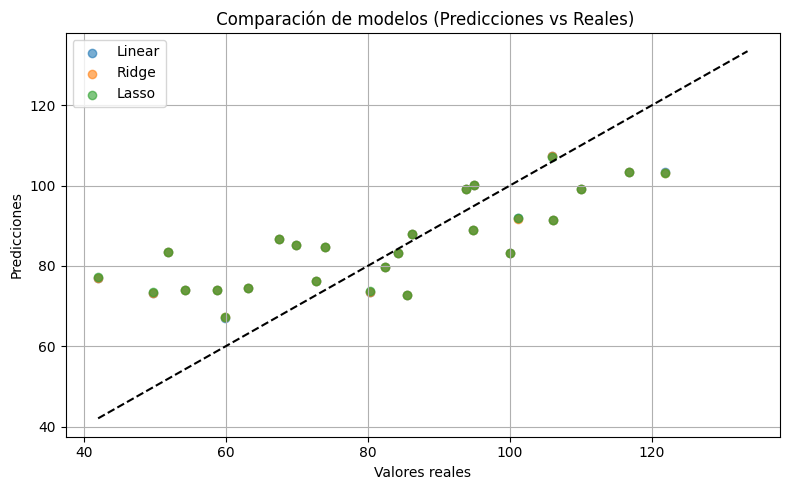

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configuracion

target = 'Indice_IPI'
variables_para_modelo = [
    'VABpb Industria, Industria manufacturera (C, CNAE 2009)',
    'VABpb Construcción (F, CNAE 2009)',
    'Solar fotovoltaica',
    'Impuestos menos subvenciones sobre los productos'
]

# Eliminación de outliers por IQR

def eliminar_outliers_iqr(df, cols):
    for col in cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Cálculo de VIF

def calcular_vif(X_df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

# Función de evaluación de modelos

def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n {nombre}:")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    return r2, rmse, y_pred

# PIPELINE

# Filtrado y limpieza
df_model = df[variables_para_modelo + [target]].copy()
df_clean = eliminar_outliers_iqr(df_model, variables_para_modelo + [target])

# Variables
X = df_clean[variables_para_modelo]
y = df_clean[target]

# VIF
print("\n VIF (multicolinealidad):")
print(calcular_vif(X))

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos
modelo_lr = LinearRegression()
modelo_ridge = Ridge(alpha=1.0)
modelo_lasso = Lasso(alpha=0.1)

# Validación cruzada (Linear Regression)
r2_cv = cross_val_score(modelo_lr, X_scaled, y, cv=5, scoring='r2')
rmse_cv = np.sqrt(-cross_val_score(modelo_lr, X_scaled, y, cv=5, scoring='neg_mean_squared_error'))
print("\n Validación cruzada (Linear Regression):")
print(f"R² promedio: {np.mean(r2_cv):.4f}")
print(f"RMSE promedio: {np.mean(rmse_cv):.2f}")

# Evaluación modelos
r2_lr, rmse_lr, y_pred_lr = evaluar_modelo(modelo_lr, X_train, X_test, y_train, y_test, "Linear Regression")
r2_ridge, rmse_ridge, y_pred_ridge = evaluar_modelo(modelo_ridge, X_train, X_test, y_train, y_test, "Ridge Regression")
r2_lasso, rmse_lasso, y_pred_lasso = evaluar_modelo(modelo_lasso, X_train, X_test, y_train, y_test, "Lasso Regression")

# VISUALIZACIÓN

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label="Linear", alpha=0.6)
plt.scatter(y_test, y_pred_ridge, label="Ridge", alpha=0.6)
plt.scatter(y_test, y_pred_lasso, label="Lasso", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title(" Comparación de modelos (Predicciones vs Reales)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
variables_para_modelo = [
    'VABpb Industria, Industria manufacturera (C, CNAE 2009)',
    'Solar fotovoltaica'
]


 VIF (para asegurar baja multicolinealidad):
                                            Variable      VIF
0  VABpb Industria, Industria manufacturera (C, C...  3.99839
1                                 Solar fotovoltaica  3.99839

 Validación cruzada (Linear Regression):
R² promedio: -0.2808
RMSE promedio: 15.36

📋 Linear Regression:
R²: 0.5982
RMSE: 15.09

📋 Ridge Regression:
R²: 0.5972
RMSE: 15.11

📋 Lasso Regression:
R²: 0.5972
RMSE: 15.11


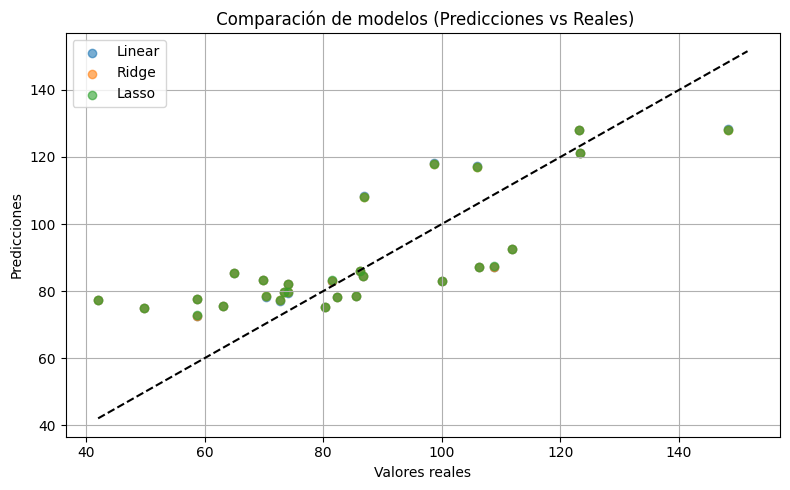

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# CONFIGURACIÓN

target = 'Indice_IPI'
variables_para_modelo = [
    'VABpb Industria, Industria manufacturera (C, CNAE 2009)',
    'Solar fotovoltaica'
]

# FUNCIONES AUXIALIARES

def eliminar_outliers_iqr(df, cols):
    for col in cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

def calcular_vif(X_df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n📋 {nombre}:")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    return r2, rmse, y_pred

# PIPELINE

df_model = df[variables_para_modelo + [target]].copy()
df_clean = eliminar_outliers_iqr(df_model, variables_para_modelo + [target])

X = df_clean[variables_para_modelo]
y = df_clean[target]

print("\n VIF (para asegurar baja multicolinealidad):")
print(calcular_vif(X))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos
modelo_lr = LinearRegression()
modelo_ridge = Ridge(alpha=1.0)
modelo_lasso = Lasso(alpha=0.1)

# Validación cruzada (Lineal)
r2_cv = cross_val_score(modelo_lr, X_scaled, y, cv=5, scoring='r2')
rmse_cv = np.sqrt(-cross_val_score(modelo_lr, X_scaled, y, cv=5, scoring='neg_mean_squared_error'))
print("\n Validación cruzada (Linear Regression):")
print(f"R² promedio: {np.mean(r2_cv):.4f}")
print(f"RMSE promedio: {np.mean(rmse_cv):.2f}")

# Evaluación en test
r2_lr, rmse_lr, y_pred_lr = evaluar_modelo(modelo_lr, X_train, X_test, y_train, y_test, "Linear Regression")
r2_ridge, rmse_ridge, y_pred_ridge = evaluar_modelo(modelo_ridge, X_train, X_test, y_train, y_test, "Ridge Regression")
r2_lasso, rmse_lasso, y_pred_lasso = evaluar_modelo(modelo_lasso, X_train, X_test, y_train, y_test, "Lasso Regression")

# VISUALIZACIÓN

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label="Linear", alpha=0.6)
plt.scatter(y_test, y_pred_ridge, label="Ridge", alpha=0.6)
plt.scatter(y_test, y_pred_lasso, label="Lasso", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title(" Comparación de modelos (Predicciones vs Reales)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



 Random Forest:
R²: 0.6652
RMSE: 13.78

 Gradient Boosting:
R²: 0.6073
RMSE: 14.92


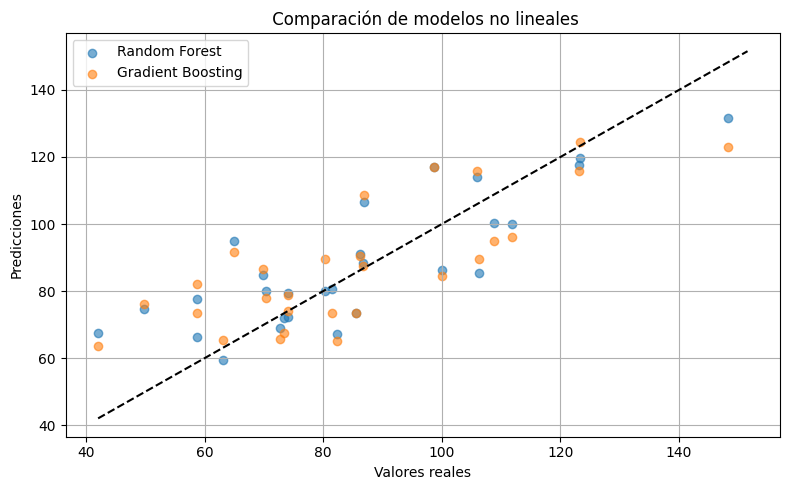

In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CONFIGURACIÓN
target = 'Indice_IPI'
variables_para_modelo = [
    'VABpb Industria, Industria manufacturera (C, CNAE 2009)',
    'Solar fotovoltaica'
]

# PREPROCESAMIENTO
df_model = df[variables_para_modelo + [target]].copy()

# Eliminar outliers con IQR
def eliminar_outliers_iqr(df, cols):
    for col in cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = eliminar_outliers_iqr(df_model, variables_para_modelo + [target])

X = df_clean[variables_para_modelo]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELOS NO LINEALES

model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)

def evaluar_modelo(nombre, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n {nombre}:")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    return y_pred, r2, rmse

# Evaluación
y_pred_rf, r2_rf, rmse_rf = evaluar_modelo("Random Forest", model_rf)
y_pred_gb, r2_gb, rmse_gb = evaluar_modelo("Gradient Boosting", model_gb)

# VISUALIZACIÓN

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.scatter(y_test, y_pred_gb, label="Gradient Boosting", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title(" Comparación de modelos no lineales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Importancia de variables en Random Forest
importances = model_rf.feature_importances_
for var, imp in zip(variables_para_modelo, importances):
    print(f"{var}: {imp:.4f}")


VABpb Industria, Industria manufacturera (C, CNAE 2009): 0.4594
Solar fotovoltaica: 0.5406


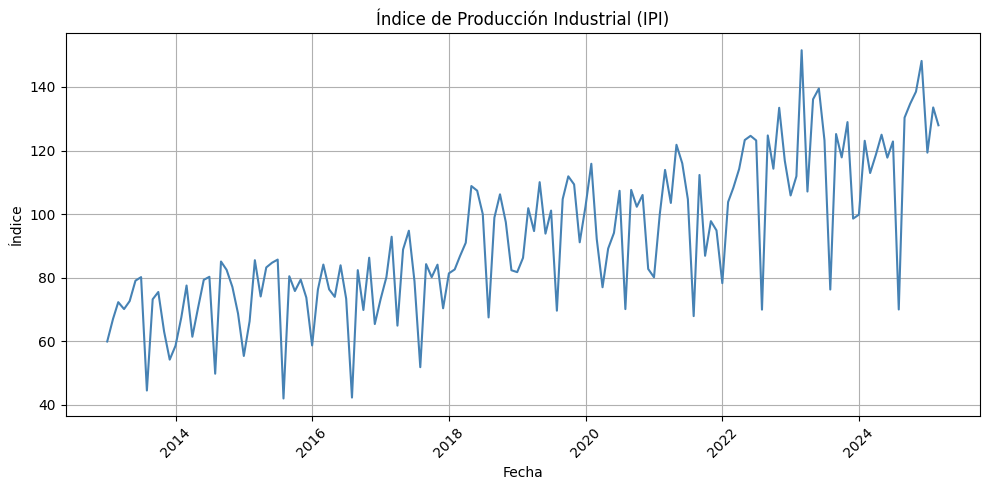

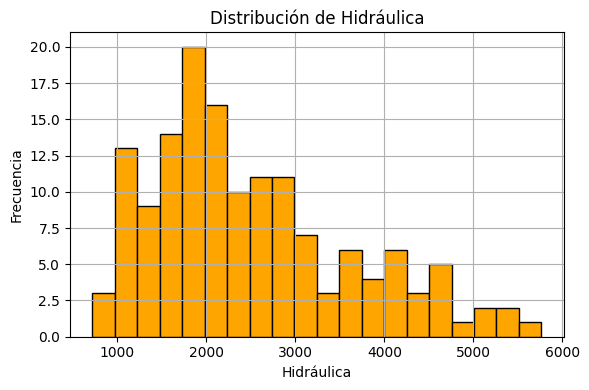

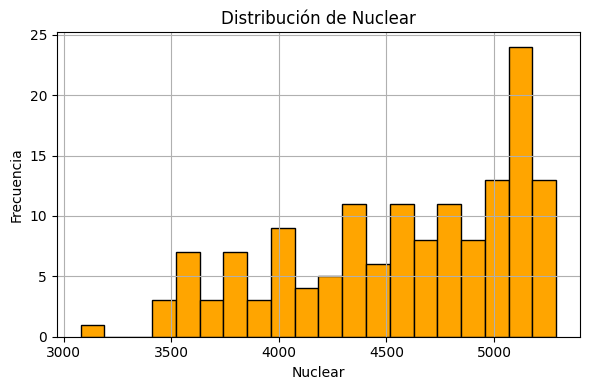

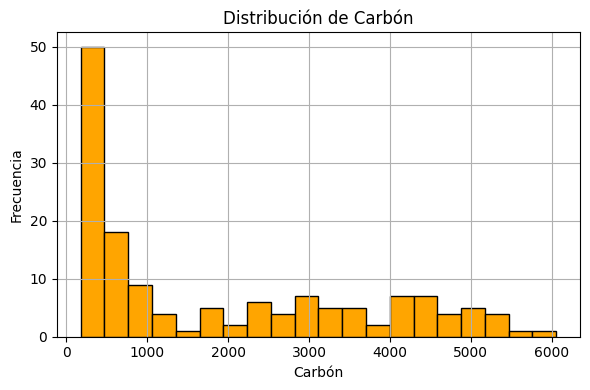

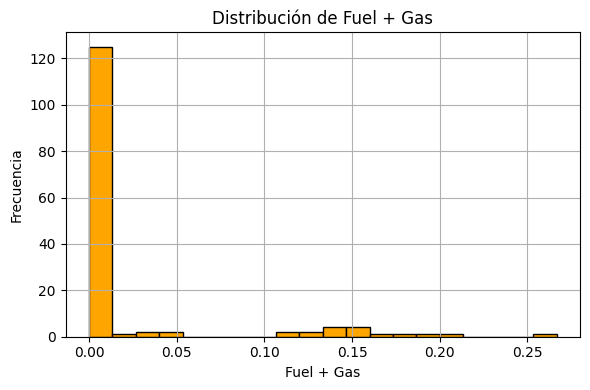

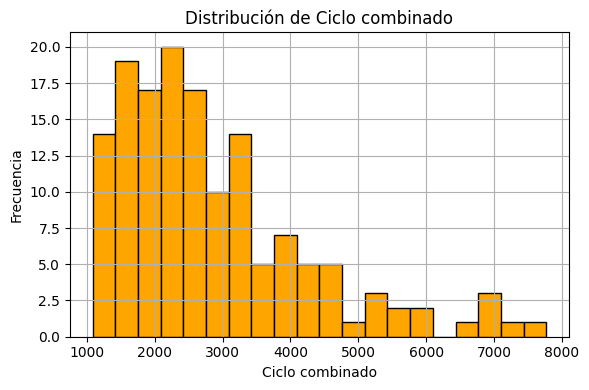

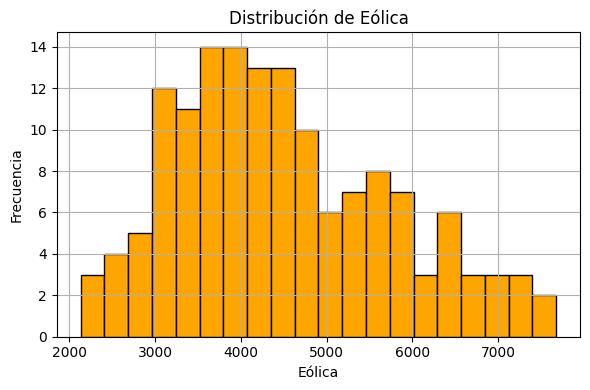

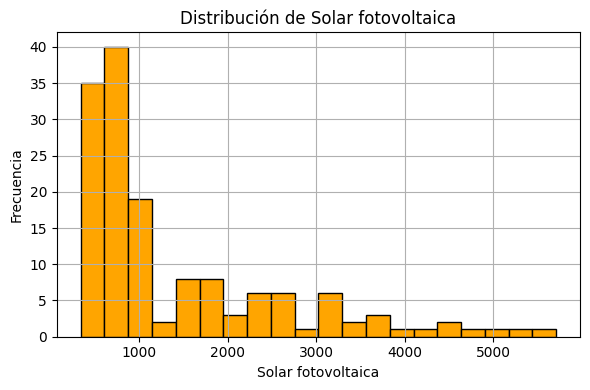

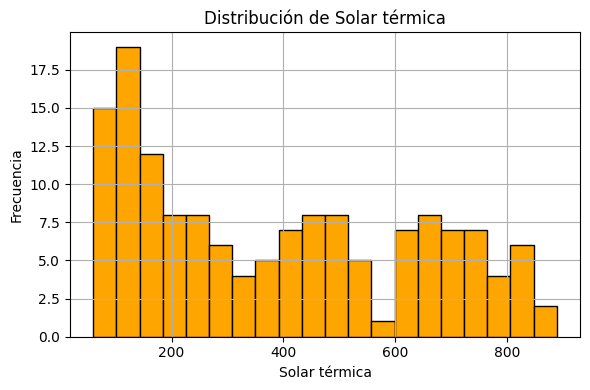

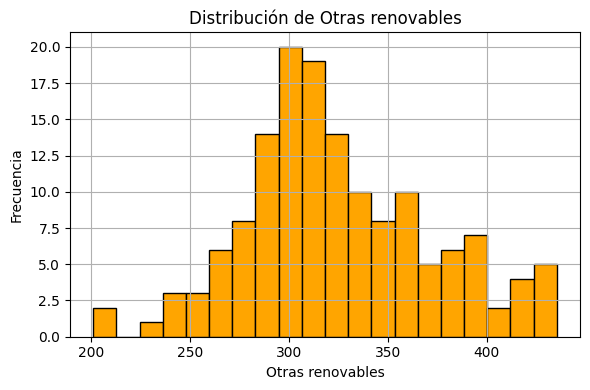

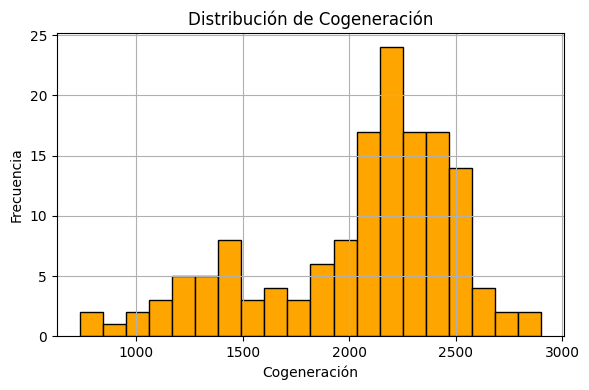

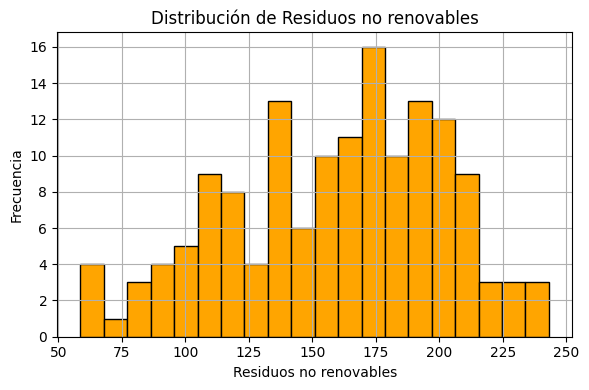

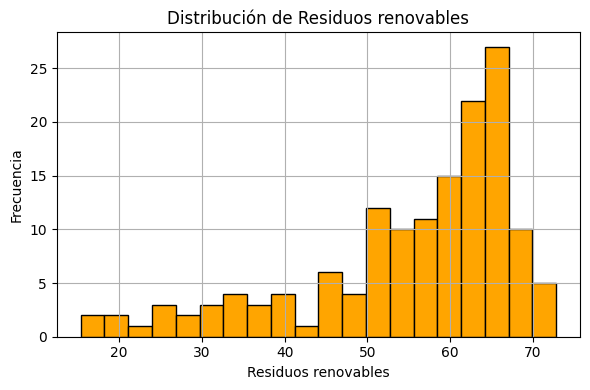

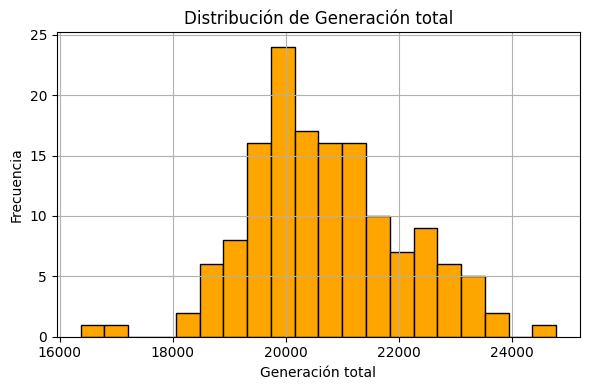

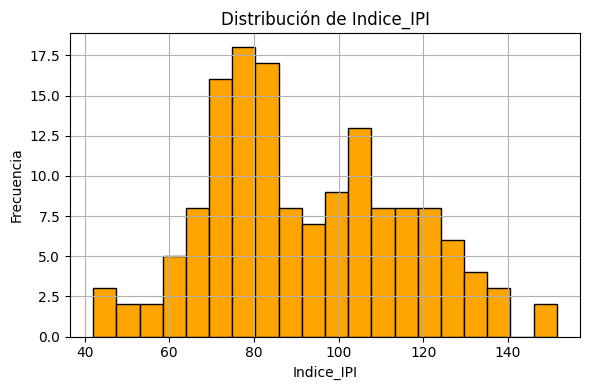

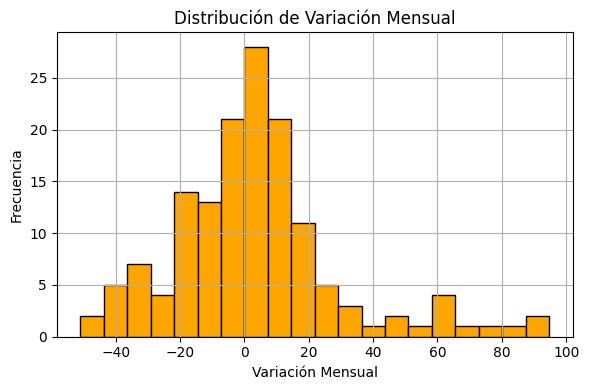

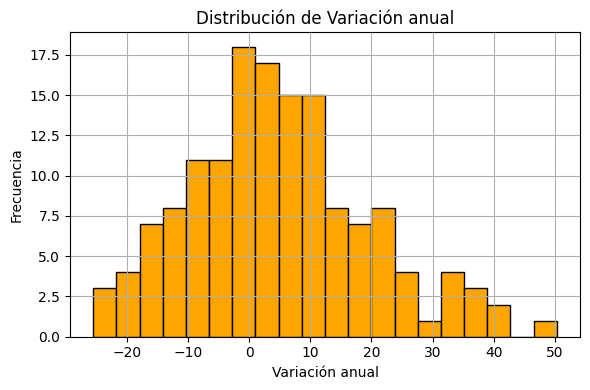

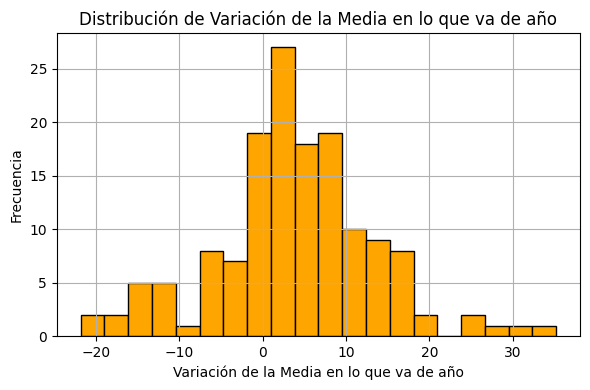

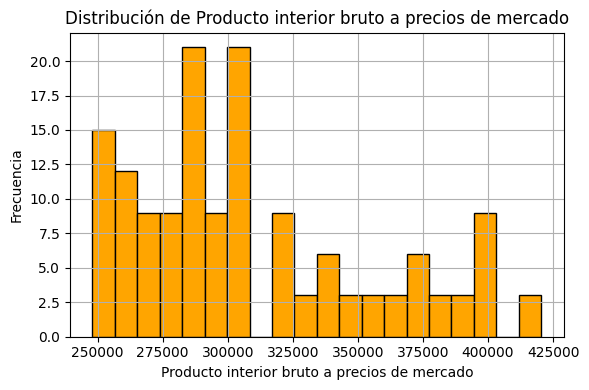

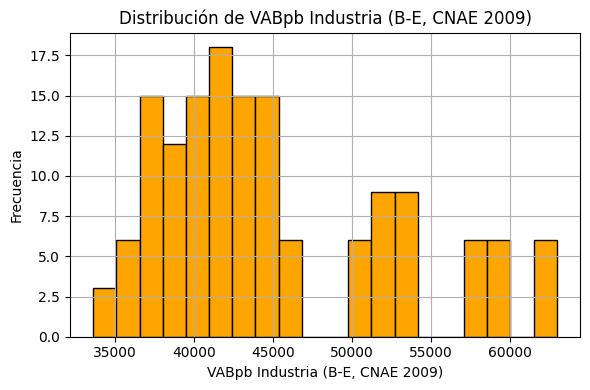

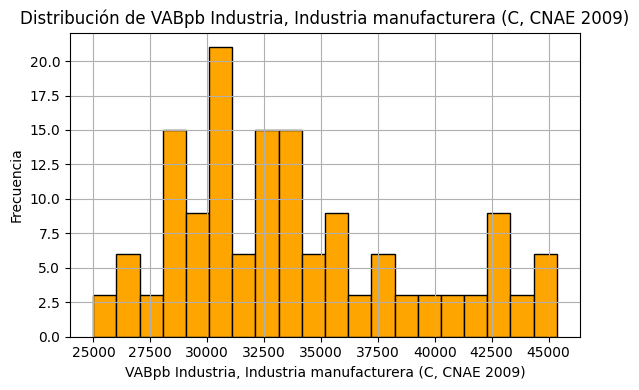

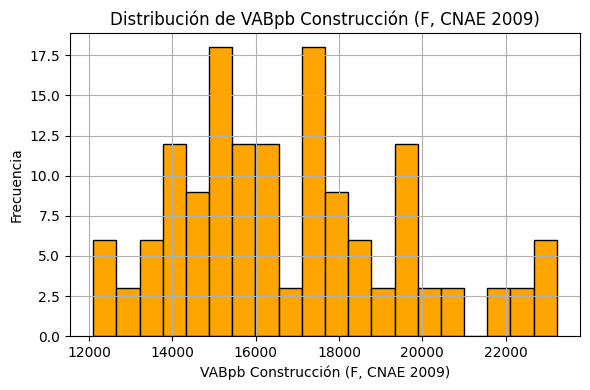

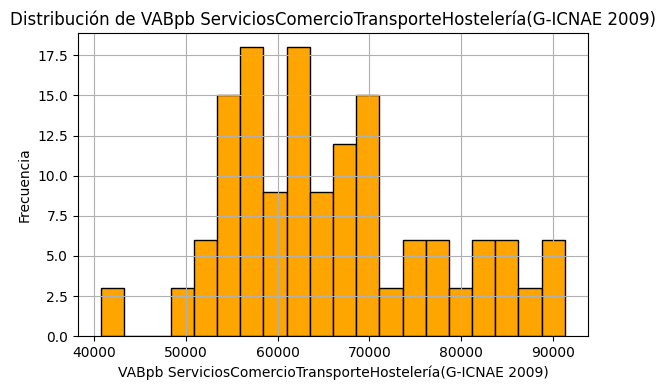

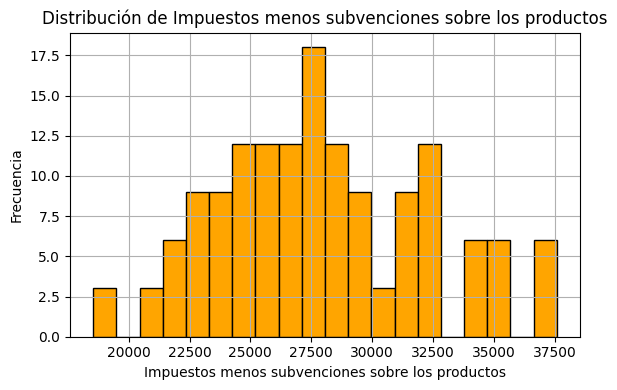

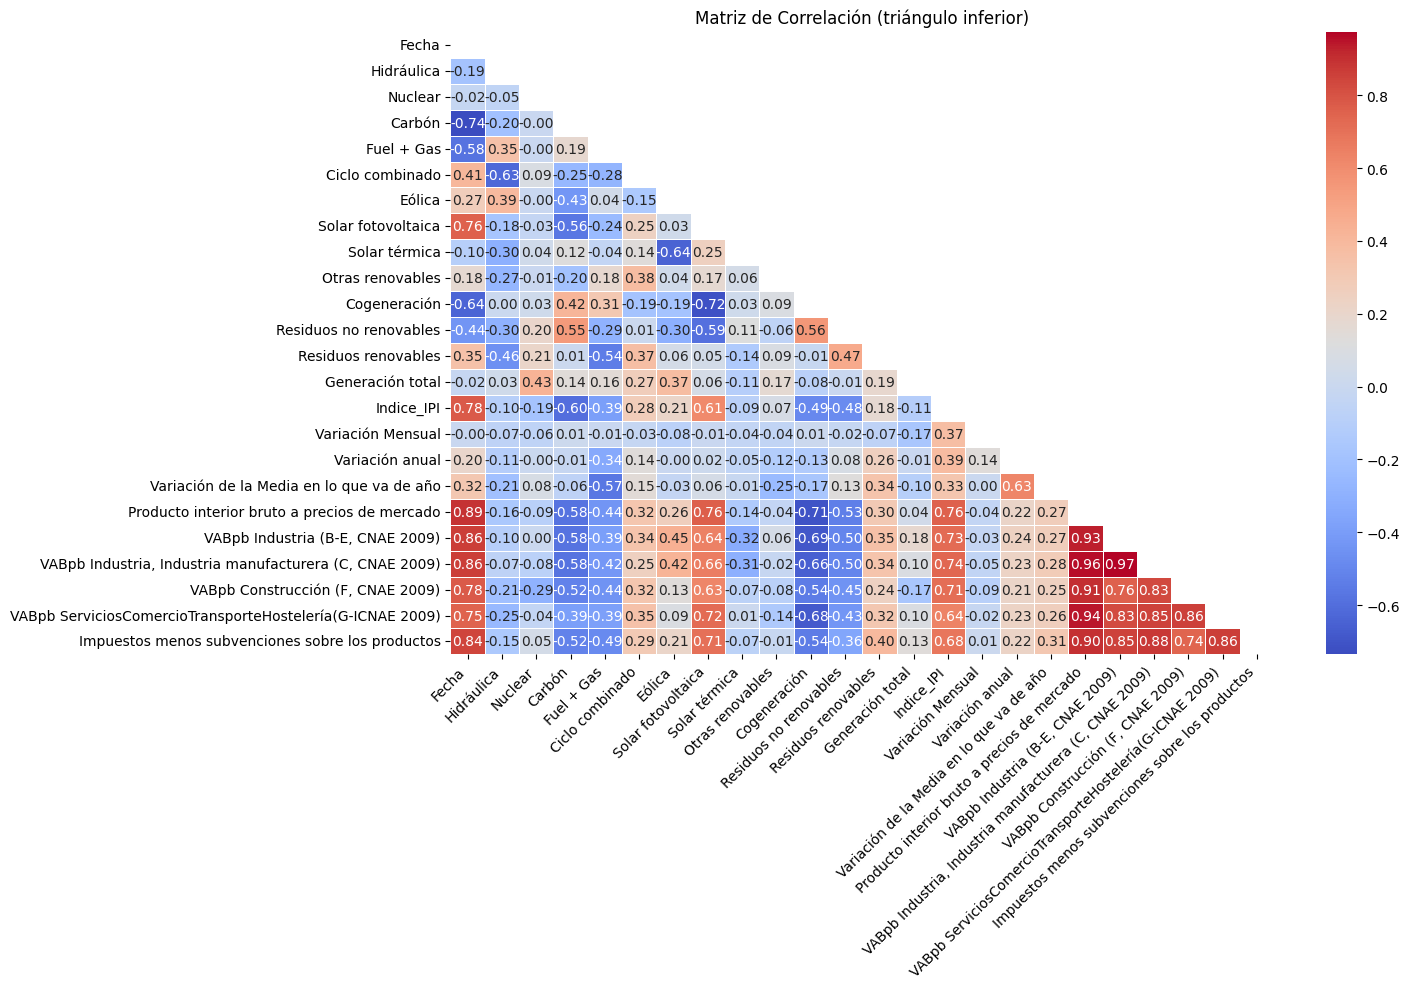


VIF (Factor de Inflación de la Varianza):
                                            Variable          VIF
1       Producto interior bruto a precios de mercado  8328.047616
3  VABpb Industria, Industria manufacturera (C, C...  3799.191848
2                   VABpb Industria (B-E, CNAE 2009)  2916.072305
6   Impuestos menos subvenciones sobre los productos   904.060123
5  VABpb ServiciosComercioTransporteHostelería(G-...   869.463465
4                  VABpb Construcción (F, CNAE 2009)   694.378203
0                                 Solar fotovoltaica     5.091862

 Validación cruzada:
R² promedio: 0.0551
RMSE promedio: 13.04

 Linear Regression:
R²: 0.2869
RMSE: 15.58

 Ridge Regression:
R²: 0.2747
RMSE: 15.72

 Lasso Regression:
R²: 0.2625
RMSE: 15.85


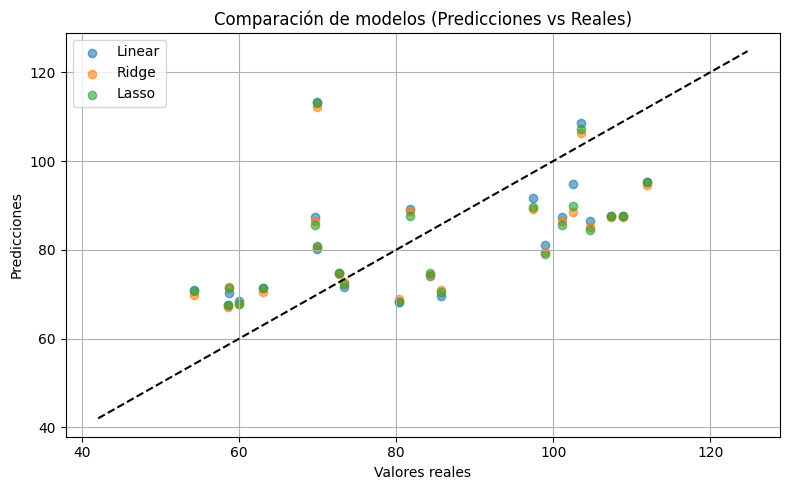

In [15]:
# ============================
# CARGA Y PREPROCESAMIENTO
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar archivo
archivo = "data_norm.xlsx"
xls = pd.ExcelFile(archivo)
df = pd.read_excel(xls, sheet_name="Generacion_IPI_Normalizada")

# Limpieza básica
df.columns = df.columns.str.strip()
df = df.loc[:, ~df.columns.duplicated()]

# Fecha como índice temporal
if "Fecha" not in df.columns:
    df["Fecha"] = pd.date_range(start="2013-01", periods=len(df), freq="MS")
else:
    df["Fecha"] = pd.to_datetime(df["Fecha"], yearfirst=True)

# ============================
# ANÁLISIS EXPLORATORIO
# ============================

# Evolución del IPI
plt.figure(figsize=(10, 5))
plt.plot(df["Fecha"], df["Indice_IPI"], color='steelblue')
plt.title("Índice de Producción Industrial (IPI)")
plt.xlabel("Fecha")
plt.ylabel("Índice")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogramas de variables numéricas
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, edgecolor='black', color='orange')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ============================
# MATRIZ DE CORRELACIÓN
# ============================

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación (triángulo inferior)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Variables altamente correlacionadas con el IPI (|r| > 0.6)
target = 'Indice_IPI'
corr_target = corr[target].drop(target).abs()
variables_utiles = corr_target[corr_target > 0.6].index.tolist()

# Eliminar columnas no deseadas
excluir = ['Fecha']
variables_utiles = [v for v in variables_utiles if v not in excluir]

# ============================
# MODELO LINEAL Y REGULARIZADO
# ============================

# Selección de variables
variables_para_modelo = variables_utiles
df_model = df[variables_para_modelo + [target]].copy()

# Función para eliminar outliers por IQR
def eliminar_outliers_iqr(df, cols):
    for col in cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = eliminar_outliers_iqr(df_model, variables_para_modelo + [target])

X = df_clean[variables_para_modelo]
y = df_clean[target]

# Calcular VIF
def calcular_vif(X_df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

print("\nVIF (Factor de Inflación de la Varianza):")
print(calcular_vif(X))

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos
modelo_lr = LinearRegression()
modelo_ridge = Ridge(alpha=1.0)
modelo_lasso = Lasso(alpha=0.1)

# Función de evaluación
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n {nombre}:")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    return y_pred

# Validación cruzada
r2_cv = cross_val_score(modelo_lr, X_scaled, y, cv=5, scoring='r2')
rmse_cv = np.sqrt(-cross_val_score(modelo_lr, X_scaled, y, cv=5, scoring='neg_mean_squared_error'))
print("\n Validación cruzada:")
print(f"R² promedio: {np.mean(r2_cv):.4f}")
print(f"RMSE promedio: {np.mean(rmse_cv):.2f}")

# Evaluar modelos
y_pred_lr = evaluar_modelo(modelo_lr, X_train, X_test, y_train, y_test, "Linear Regression")
y_pred_ridge = evaluar_modelo(modelo_ridge, X_train, X_test, y_train, y_test, "Ridge Regression")
y_pred_lasso = evaluar_modelo(modelo_lasso, X_train, X_test, y_train, y_test, "Lasso Regression")

# ============================
# VISUALIZACIÓN DE RESULTADOS
# ============================

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label="Linear", alpha=0.6)
plt.scatter(y_test, y_pred_ridge, label="Ridge", alpha=0.6)
plt.scatter(y_test, y_pred_lasso, label="Lasso", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación de modelos (Predicciones vs Reales)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
